In [59]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
FILE_PATH_CSV_SCORES = './model3_final_scores.csv'

In [61]:
df_scores = pd.read_csv(FILE_PATH_CSV_SCORES,).reset_index().rename(columns={'index':'episode'})
df_scores.head()

,episode,Result,Castle_size,Steps,Invalid_steps
0,0,Lose,9,422,411
1,1,Lose,10,154,148
2,2,Lose,7,120,97
3,3,Lose,10,2718,2707
4,4,Lose,10,267,261


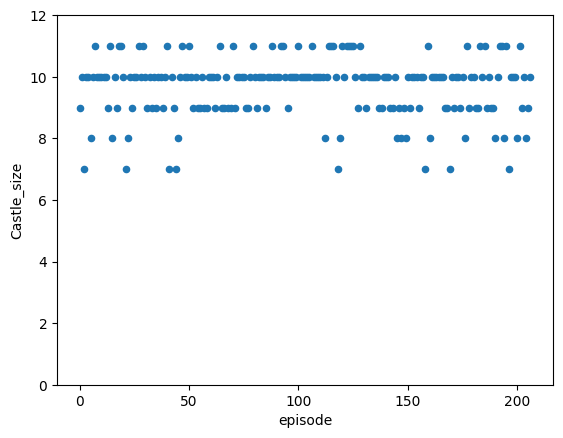

In [62]:
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Castle_size',
)

plt.ylim((0,12))
plt.show()

In [63]:
# negative correlation shows that additional training is working
df_scores.corr(numeric_only=True)['Castle_size']['episode']

np.float64(-0.04465409651470128)

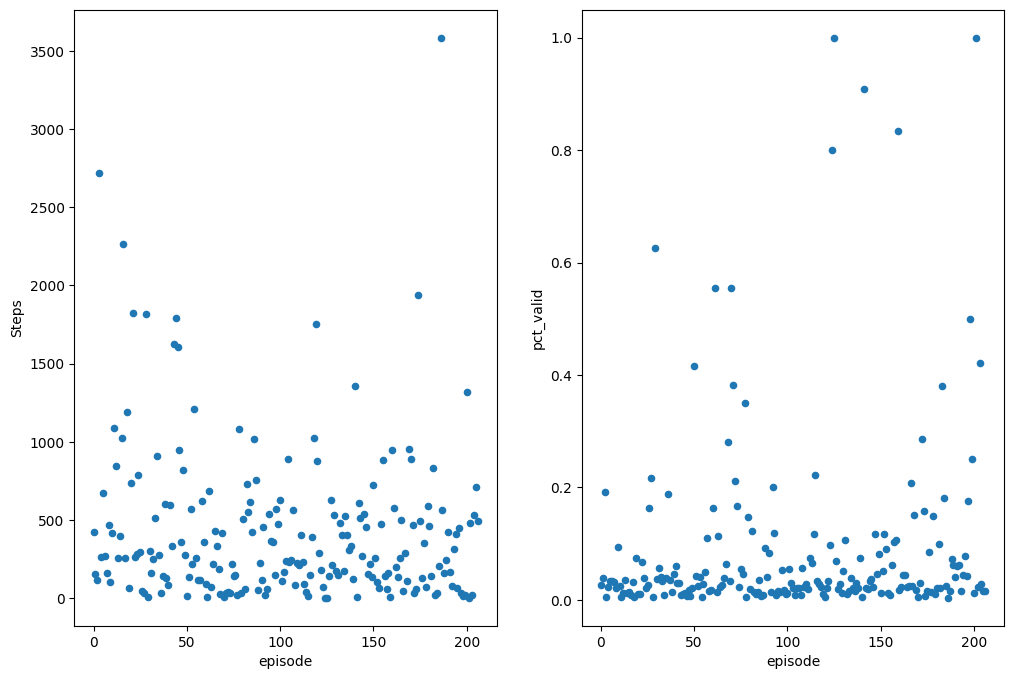

In [64]:
df_scores['pct_valid'] = (df_scores['Steps'] - df_scores['Invalid_steps']) / df_scores['Steps']
plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Steps',
    ax=ax,
)
ax = plt.subplot(1,2,2)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='pct_valid',
    ax=ax,
)
plt.show()

<Axes: >

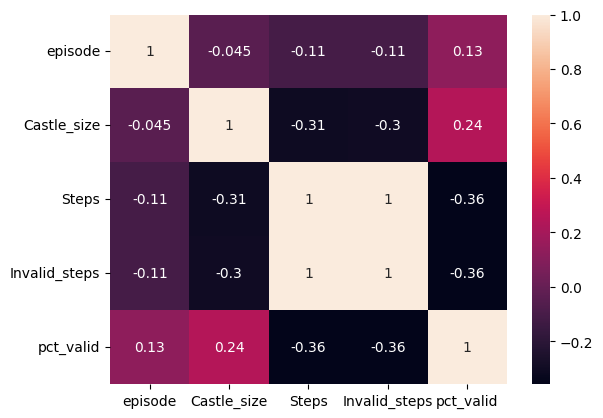

In [66]:
heat_data = df_scores.corr(numeric_only=True)
sns.heatmap(heat_data, annot=True)